In [1]:
# importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# reading data into a pandas dataframe

df = pd.read_csv("train.csv", header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- We can see that columns 'Age', 'Cabin', and 'Embarked' has null (missing) values

In [6]:
# Handling missing values from all rows containing null values

# replacing age by mean age
avg_age = df["Age"].astype("float").mean(axis=0)
df["Age"].replace(np.nan, avg_age, inplace=True)

# replacing 'Embarked' by maximum frequency
df['Embarked'].value_counts()
df['Embarked'].value_counts().idxmax()
df["Embarked"].replace(np.nan, "S", inplace=True)

# drop whole row with NaN in "Cabin" column
df=df.dropna(subset=['Cabin'], axis=0)

# # reset index, because we droped rows
df.reset_index(drop=True, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    object 
 5   Age          204 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     204 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 19.2+ KB


### Exploratory Data Analysis

In [8]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,204.000000,204.000000,204.000000,204,204,204.000000,204.000000,204.000000,204,204.000000,204,204
unique,NaN,NaN,NaN,204,2,NaN,NaN,NaN,142,NaN,147,3
top,NaN,NaN,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,NaN,NaN,NaN,113760,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,107,NaN,NaN,NaN,4,NaN,4,131
mean,455.401961,0.666667,1.196078,NaN,NaN,35.258349,0.441176,0.436275,NaN,76.141504,NaN,NaN
std,251.379279,0.472564,0.525961,NaN,NaN,15.034028,0.628918,0.729976,NaN,74.391749,NaN,NaN
min,2.000000,0.000000,1.000000,NaN,NaN,0.920000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,261.750000,0.000000,1.000000,NaN,NaN,25.000000,0.000000,0.000000,NaN,29.453125,NaN,NaN
50%,457.500000,1.000000,1.000000,NaN,NaN,34.000000,0.000000,0.000000,NaN,55.220850,NaN,NaN
75%,684.000000,1.000000,1.000000,NaN,NaN,47.000000,1.000000,1.000000,NaN,89.328150,NaN,NaN


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [10]:
# Finding if any of the variables are interdependent

test = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()
test

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.033032,-0.222591,0.128306
Pclass,-0.033032,1.000000,-0.288340,-0.311713
Age,-0.222591,-0.288340,1.000000,-0.075563
Fare,0.128306,-0.311713,-0.075563,1.000000


(0.0, 102.3574776617647)

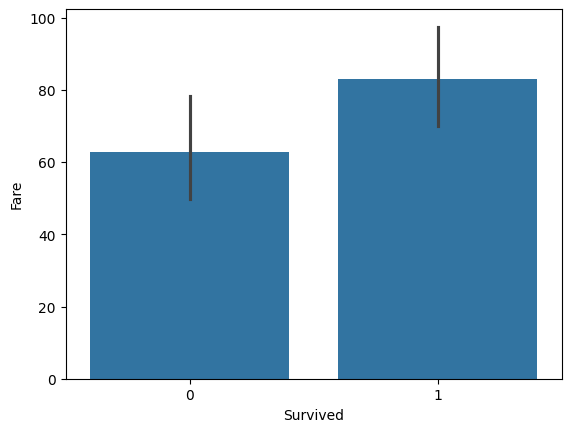

In [11]:
# Bar plot
sns.barplot(x="Survived", y="Fare", data=df)
plt.ylim(0,)

<Axes: xlabel='Survived', ylabel='Fare'>

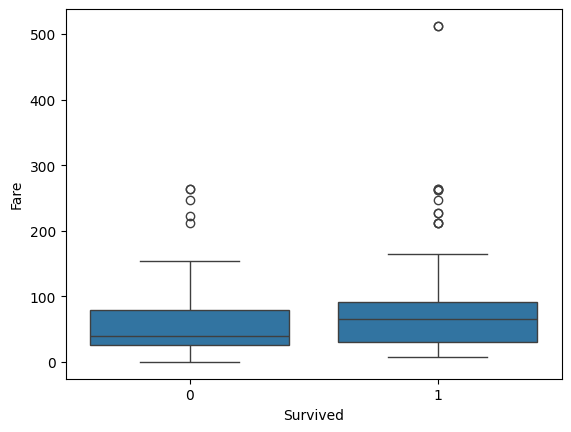

In [12]:
# Box plot
sns.boxplot(x="Survived", y="Fare", data=df)

- From the above barplot and boxplot, we can see that the people who paid more fare had a greater chance of survival

(0.0, 1.05)

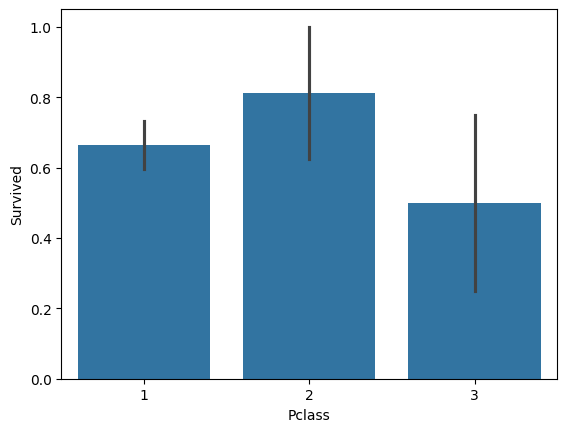

In [13]:
# Bar plot
sns.barplot(x="Pclass", y="Survived", data=df)
plt.ylim(0,)

- From above barplot, we can see that mojarity of survivors were belonging to passenger class 2

(0.0, 102.75002732173294)

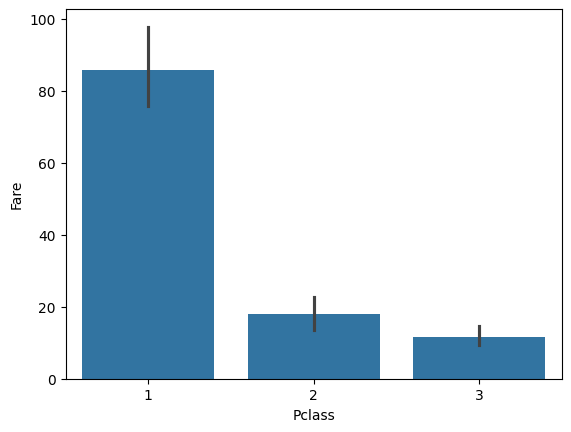

In [14]:
# Bar plot
sns.barplot(x="Pclass", y="Fare", data=df)
plt.ylim(0,)

<Axes: xlabel='Pclass', ylabel='Fare'>

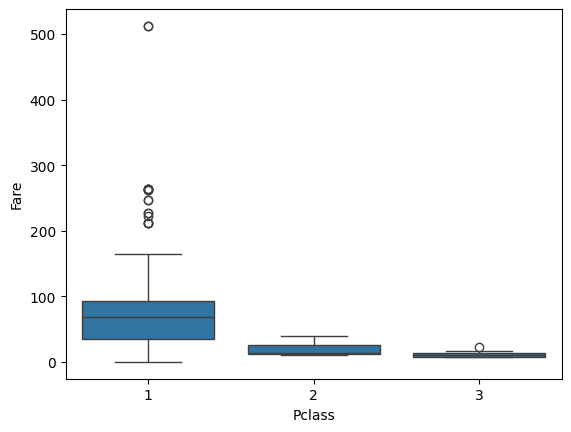

In [15]:
# Box plot
sns.boxplot(x="Pclass", y="Fare", data=df)

- The above two graphs also help us understand that people paid higher price for upper-class passenger couch

In [16]:
df_survived = df[df['Survived'] == 1]['Sex'].to_frame()
# df_survived
df_survived.describe(include='all')

,Sex
count,136
unique,2
top,female
freq,91


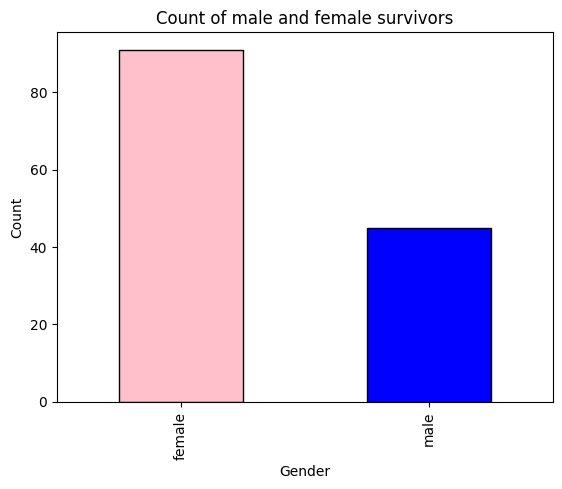

In [17]:
gender_counts = df_survived['Sex'].value_counts()

# Plotting the bar plot
gender_counts.plot(kind='bar', color=['pink', 'blue'], edgecolor='black')

plt.title('Count of male and female survivors')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

- From above barplot, we can see that majority of the survivors were females